In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("data/38_feature.csv",index_col=0)
data_norm = pd.read_csv("data/38_feature_norm.csv",index_col=0)
data_std_scale = pd.read_csv("data/38_feature_std_scale.csv",index_col=0)

X = data.iloc[:,2:]
y2 = data['class2']
y4 = data['class4']
X_norm = data_norm.iloc[:,2:]
X_std_scale = data_std_scale.iloc[:,2:]

In [6]:
# define dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y4 , stratify=y4,test_size=0.20, random_state=12)

## LR

accuracy 10-fold CV test 0.6362912912912912
accuracy on train set 0.7431693989071039
accuracy on test set 0.6304347826086957


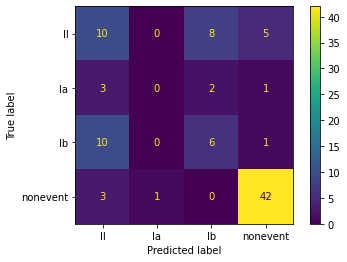

In [8]:
from sklearn.linear_model import LogisticRegression
LR_clf =LogisticRegression(C=20,penalty='l2',solver='newton-cg',max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(LR_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(LR_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(LR_clf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,LR_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR_clf.classes_)
disp.plot()
plt.show()

## SVM

accuracy 10-fold CV test 0.6592192192192193
accuracy on train set 0.8415300546448088
accuracy on test set 0.6630434782608695


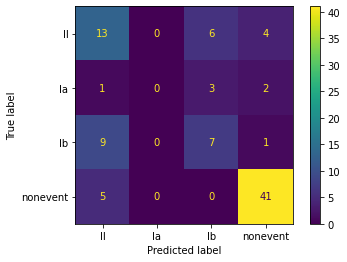

In [24]:
from sklearn.svm import SVC
SVC_clf =SVC(C=10,kernel='rbf',probability=True).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(SVC_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(SVC_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(SVC_clf.predict(X_test),y_test))


from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,SVC_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVC_clf.classes_)
disp.plot()
plt.show()

##### to see the accuracy of SVM-4-Class classifer in binary aspect.

In [48]:
df = pd.DataFrame()
for i in range(2000):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y4 ,stratify=y4,test_size=0.20)

    from sklearn.svm import SVC
    SVC_clf =SVC(C=10,kernel='rbf',probability=True).fit(X_train, y_train)
    cm = confusion_matrix(y_test,SVC_clf.predict(X_test))

    df.loc[i,0] = (cm[0:3,0:3].sum()+cm[3,3])/cm.sum()
print('the svm 4-class classfier BINARY accuracy',df.mean())

the svm 4-class classfier BINARY accuracy 0    0.863353
dtype: float64


## KNN

accuracy 10-fold CV test 0.6354654654654656
accuracy on train set 1.0
accuracy on test set 0.6739130434782609


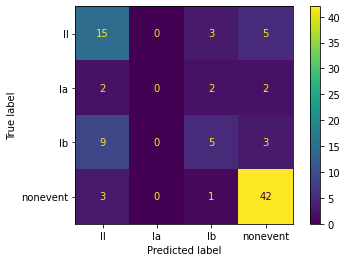

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(metric = 'euclidean',n_neighbors=10, weights= 'distance').fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(KNN_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(KNN_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(KNN_clf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,KNN_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN_clf.classes_)
disp.plot()
plt.show()

## DT

accuracy 10-fold CV test 0.6473198198198199
accuracy on train set 0.6584699453551912
accuracy on test set 0.6413043478260869


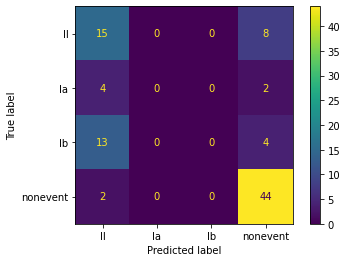

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion = 'gini',max_depth=2, max_features= None, min_samples_split=2, splitter='best')
DT_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(DT_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(DT_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(DT_clf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,DT_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT_clf.classes_)
disp.plot()
plt.show()

## RF

accuracy 10-fold CV test 0.655382882882883
accuracy on train set 1.0
accuracy on test set 0.6630434782608695


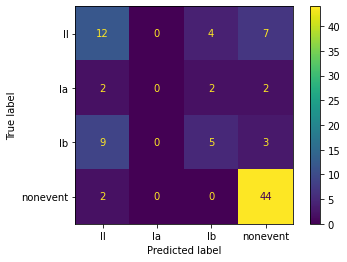

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_features = 'sqrt',n_estimators=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(RF_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(RF_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(RF_clf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,RF_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_clf.classes_)
disp.plot()
plt.show()

## GB

accuracy 10-fold CV test 0.6550825825825827
accuracy on train set 1.0
accuracy on test set 0.6304347826086957


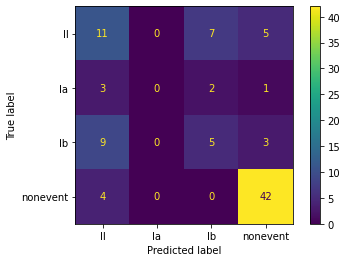

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators = 1000,learning_rate=0.1,subsample=0.7,max_depth=7).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(GB_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(GB_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(GB_clf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,GB_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GB_clf.classes_)
disp.plot()
plt.show()

In [18]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[
        ('RF_clf', RF_clf),
        ('SVC_clf',SVC_clf)],
    voting='soft')

eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('RF_clf',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_estimators=1000)),
                             ('SVC_clf', SVC(C=10, probability=True))],
                 voting='soft')

accuracy 10-fold CV test 0.6515165165165164
accuracy on train set 0.9672131147540983
accuracy on test set 0.6847826086956522


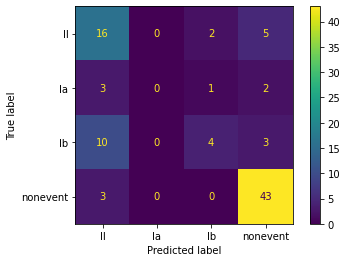

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(eclf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(eclf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(eclf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,eclf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf.classes_)
disp.plot()
plt.show()

### RF+GB+SVM

accuracy 10-fold CV test 0.6537162162162162
accuracy on train set 1.0
accuracy on test set 0.6413043478260869


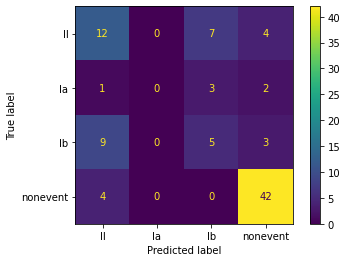

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(eclf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(eclf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(eclf.predict(X_test),y_test))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,eclf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf.classes_)
disp.plot()
plt.show()